# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: ANOVA
### VIDEO: One-way ANOVA (independent samples)
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

In [2]:
## data parameters

# group means
mean1 = 4
mean2 = 3.8
mean3 = 7

# samples per group
N1 = 30
N2 = 33
N3 = 39

# standard deviation (assume common across groups)  <- это необязательно
stdev = 2

In [3]:
## now to simulate the data
data1 = mean1 + np.random.randn(N1)*stdev
data2 = mean2 + np.random.randn(N2)*stdev
data3 = mean3 + np.random.randn(N3)*stdev

datacolumn = np.hstack((data1, data2, data3))

# group labels
# Умножение "чистых" списков Python на n: повторение значений списка n-раз 
# (не перемножение значений на n!)
# Cложение чистых" списков Python - по сути, конкатенация; объединение списков в 1
groups = ['1']*N1 + ['2']*N2 + ['3']*N3  

# convert to a pandas dataframe
df = pd.DataFrame({'TheData': datacolumn,'Group': groups})
df

,TheData,Group
0,4.693882,1
1,2.141107,1
2,7.691882,1
3,4.127549,1
4,5.186135,1
...,...,...
97,4.625476,3
98,6.418293,3
99,6.159121,3
100,7.083324,3


In [4]:
pg.anova(data=df, dv='TheData', between='Group', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Group,234.125820,2,117.062910,25.519459,1.153049e-09,0.340171
1,Within,454.132978,99,4.587202,NaN,NaN,NaN


In [5]:
pg.pairwise_tukey(data=df, dv='TheData', between='Group')

# SE - стандартная ошибка.
# Общая формула - среднеквадратичное отклонение разделить на корень объёма выборки.
# В данном же случае ошибка считается для каждой пары А и Б как корень из суммы 
# MSwithin разделить на количество элементов в выборке 1 
# + 
# MSwithin разделить на количество элементов в выборке 2
# (ведь количество элементов в группах может быть не равно).
# Важное замечание: по сути, стандартная ошибка - знаменатель для расчёта Т-значения.

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,3.560906,4.192051,-0.631144,0.540290,-1.168159,0.476601,-0.291045
1,1,3,3.560906,6.967159,-3.406253,0.520122,-6.548945,0.001000,-1.572518
2,2,3,4.192051,6.967159,-2.775109,0.506583,-5.478089,0.001000,-1.281773


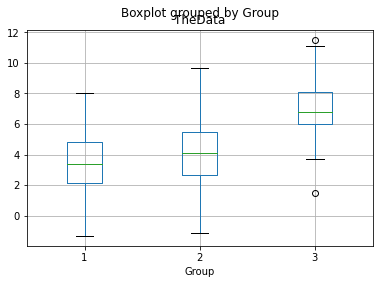

In [6]:
df.boxplot('TheData', by='Group');